# Collaborative Filtering Using k-Nearest Neighbors (kNN) 
https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-part-2-k-nearest-neighbors-and-matrix-c04b3c2ef55c
http://www2.informatik.uni-freiburg.de/~cziegler/BX/    link for dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv("BX-Users.csv",sep=";",error_bad_lines=False,encoding="latin-1")
users.columns=["userID",'location','age']

In [3]:
books = pd.read_csv("BX-Books.csv",sep=";",error_bad_lines=False, encoding="latin-1")
books.columns = ["ISBN","bookTitle","bookAuthor","yearPublication","publisher",'imageURLS','imageURLM','imageURLL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: Dtype

In [4]:
ratings= pd.read_csv("BX-Book-Ratings.csv",sep=";",error_bad_lines=False, encoding="latin-1")
ratings.columns = ["userID",'ISBN','bookRating']

In [5]:
ratings.head(3)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [6]:
print(list(books.columns))
# Dropping the unnecessary features
columns=['bookAuthor', 'yearPublication', 'publisher', 'imageURLS', 'imageURLM', 'imageURLL']
book = books.drop(columns, axis=1)

['ISBN', 'bookTitle', 'bookAuthor', 'yearPublication', 'publisher', 'imageURLS', 'imageURLM', 'imageURLL']


In [7]:
users.head(3)

,userID,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [8]:
print(ratings.shape)
print(users.shape)
print(books.shape)

(1149780, 3)
(278858, 3)
(271360, 8)


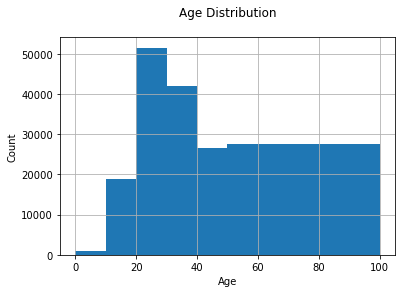

In [9]:
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

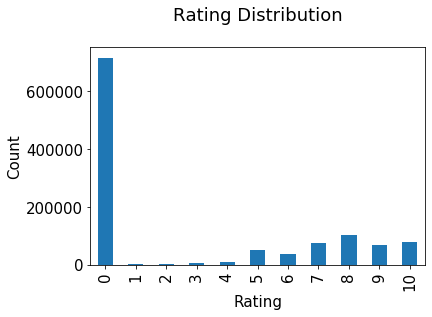

In [10]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [11]:
# Recommendation Based on Rating Counts how many rating a particular book 

rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head(3)

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883


In [12]:
# The book with ISBN “0971880107” received the most rating counts.
# Let’s find out what book it is, and what books are in the top 5.

most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
# merge the books rating and bootTitle
most_rated_books_summary = pd.merge(most_rated_books, book, on='ISBN')
most_rated_books_summary.head()

,ISBN,bookTitle
0,0971880107,Wild Animus
1,0316666343,The Lovely Bones: A Novel
2,0385504209,The Da Vinci Code
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel
4,0312195516,The Red Tent (Bestselling Backlist)


#### Recommendations based on correlations
* We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books.

* First, we need to find out the average rating, and the number of ratings each book received. 

In [13]:

average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


* To ensure statistical significance users with less than 200 ratings, and books with less than 100 ratings are excluded. 

In [14]:
# How many people give the rating a book above to 200.
counts_userRating = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts_userRating[counts_userRating >=200].index)]
# how many books get the rating to above 100.
counts_bookRating = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts_bookRating[counts_bookRating >=100].index)]

In [15]:
ratings.head(3)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8


In [16]:
# merge the book and rating dataFrame
merge_rating_book= pd.merge(ratings, book, on ="ISBN")
merge_rating_book.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


We then group by book titles and create a new column for total rating count

##### Collaborative Filtering Using k-Nearest Neighbors (kNN)
kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user, 

In [17]:
merge_rating_book = merge_rating_book.dropna(axis = 0, subset = ['bookTitle'])
book_ratingCount = (merge_rating_book.
                    groupby(by = ['bookTitle'])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'totalRatingCount'})
                    [['bookTitle','totalRatingCount']]
                    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1



We combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [18]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [19]:
rating_with_totalRatingCount = merge_rating_book.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


 About 1% of the books received 50 or more ratings.
Because we have so many books in our data, we will limit it to the top 1%, and this will give us 2713 unique books.

In [20]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


### Filter to users in US and Canada only
In order to improve computing speed, and not run into the “MemoryError” issue, I will limit our user data to those in the US and Canada. And then combine the user data with rating data and total rating count data

In [33]:
# Filter to users in US and Canada only

combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['location'].str.contains("usa|canada")]
# dropping the age column because its not requried for recommenditon so just will drop it..
us_canada_user_rating=us_canada_user_rating.drop('age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


###  Implementing kNN
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.


In [22]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [23]:
us_canada_user_rating_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2nd Chance,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4 Blondes,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
84 Charing Cross Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000


#### Finding the Nearest Neighbors
We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [24]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [25]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

473


In [26]:
us_canada_user_rating_pivot.iloc[query_index:,].values.reshape(1,-1)


array([[0., 0., 0., ..., 0., 0., 0.]])

In [27]:
us_canada_user_rating_pivot.index[query_index]

"Sophie's World: A Novel About the History of Philosophy"

## Test our model and make some recommendations:
In this step, the kNN algorithm measures distance to determine the “closeness” of instances. It then classifies an instance by finding its nearest neighbors, and picks the most popular class among the neighbors.

In [28]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print(f"Recommendition for {us_canada_user_rating_pivot.index[query_index]}")
    else:
        print(f"{i}: {us_canada_user_rating_pivot.index[indices.flatten()[i]]} with distance of {distances.flatten()[i]} ")

Recommendition for Sophie's World: A Novel About the History of Philosophy
1: Bastard Out of Carolina with distance of 0.8295297645020601 
2: The First Wives Club Movie Tie In with distance of 0.838622683376796 
3: Tales of a Fourth Grade Nothing with distance of 0.8523458793573143 
4: Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships with distance of 0.8547753659841054 
5: Suzanne's Diary for Nicholas with distance of 0.861094283460048 
